In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('lung_disease.csv')

In [3]:
df

,Diagnosis,ID,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
394,Infected,I176,NaN,NaN,NaN,NaN,0,49,2
395,Infected,I177,NaN,NaN,NaN,NaN,0,37,1
396,Infected,I178,NaN,NaN,NaN,NaN,0,29,1
397,Infected,I179,NaN,NaN,NaN,NaN,1,51,1


# data Preprocessing 

In [5]:
df.isnull().sum()

Diagnosis             0
ID                    0
Imagery_part_min    299
Imagery_part_avg    299
Real_part_min       299
Real_part_avg       299
Gender                0
Age                   0
Smoking               0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [10]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [11]:
df

,Diagnosis,ID,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,1,95,6,79,9,68,1,60,1
1,1,96,4,44,14,32,0,55,1
2,1,97,5,31,13,12,1,56,2
3,1,98,3,33,14,36,1,59,1
4,1,99,4,39,12,4,0,48,1
...,...,...,...,...,...,...,...,...,...
394,3,394,19,96,27,98,0,32,1
395,3,395,19,96,27,98,0,20,0
396,3,396,19,96,27,98,0,12,0
397,3,397,19,96,27,98,1,34,0


In [14]:
X=df.drop('Diagnosis',axis=1)

In [15]:
X

,ID,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,95,6,79,9,68,1,60,1
1,96,4,44,14,32,0,55,1
2,97,5,31,13,12,1,56,2
3,98,3,33,14,36,1,59,1
4,99,4,39,12,4,0,48,1
...,...,...,...,...,...,...,...,...
394,394,19,96,27,98,0,32,1
395,395,19,96,27,98,0,20,0
396,396,19,96,27,98,0,12,0
397,397,19,96,27,98,1,34,0


<AxesSubplot:ylabel='Diagnosis'>

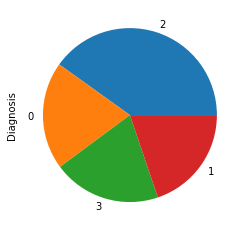

In [20]:
df['Diagnosis'].value_counts().plot(kind='pie')

In [24]:
y=df['Diagnosis']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
print("The shape of training data is ",X_train.shape)
print("The shape of testing data is ",X_test.shape)

The shape of training data is  (319, 8)
The shape of testing data is  (80, 8)


# buliding model Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
tr=DecisionTreeClassifier(criterion='entropy')

In [40]:
tr.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
y_pred=tr.predict(X_test)

In [43]:
y_pred[0:10]

array([1, 2, 2, 3, 3, 2, 3, 2, 2, 2])

In [44]:
y_test[0:10]

63     1
166    2
84     2
93     2
331    3
107    2
335    3
204    2
140    2
98     2
Name: Diagnosis, dtype: int64

In [45]:
from sklearn import metrics

In [46]:
print("The accuracy of the model is ",metrics.accuracy_score(y_pred,y_test))

The accuracy of the model is  0.925


In [48]:
print("The confussion matrix is \n",metrics.confusion_matrix(y_pred,y_test))

The confussion matrix is 
 [[20  0  0  0]
 [ 0 10  0  0]
 [ 1  3 37  1]
 [ 0  0  1  7]]


In [49]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.77      1.00      0.87        10
           2       0.97      0.88      0.93        42
           3       0.88      0.88      0.88         8

    accuracy                           0.93        80
   macro avg       0.89      0.94      0.91        80
weighted avg       0.93      0.93      0.93        80

